# Assume a beam has a normal type distribution
$ A = const \times e^{- \frac{\theta^2}{2B^2}}$

## to turn this to a normal distribution 
$const = \frac{1}{\sqrt{2\pi B^2)}}  \equiv \frac{1}{B\sqrt{2\pi}}$

## to maximum = 1 at the origin
$const =1$

In [23]:
import numpy as np
%pylab inline
def flux(theta,B):
    x=0.5*(theta/B)**2
    f=np.exp(-x)
    return f


Populating the interactive namespace from numpy and matplotlib


In [24]:
def fwhm2B(f):
    B=0.5*f/np.sqrt(2*np.log(2))
    return B


In [25]:
print fwhm2B(1.017)

0.431880135446


In [26]:
1.01728225945/0.432

2.354820045023148

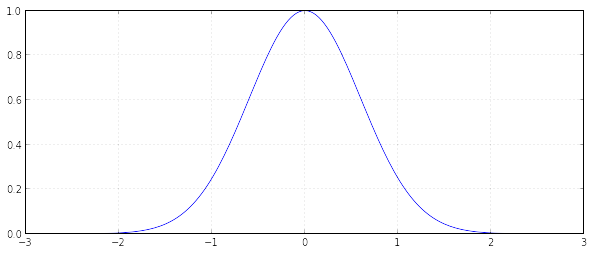

In [27]:
B=0.6 # for example only

pylab.figure(figsize=(10,4))
theta=np.arange(-5*B, 5*B, B/20.)
pylab.plot(theta,flux(theta,B))
pylab.grid()
pylab.show()

In [28]:
"""

Numerical checks for my derivation

"""

def deriv(pos,B,step=0.01):
    d=(flux(pos+step,B) -flux(pos-step,B))/(2*step)
    return d
print deriv(0,B), deriv(-B,B), deriv(B,B)

def deriv2(pos,B,step=0.01):
    d2=(deriv(pos+step,B) - deriv(pos-step,B))/(2*step)
    return d2

print deriv2(-B,B), deriv2(0,B), deriv2(B,B)

0.0 1.01079083634 -1.01079083634
-0.000311908938677 -2.77700631571 -0.000311908938677


In [29]:
print flux(B,B), flux(0,B)

0.606530659713 1.0


In [30]:
bhalf=B*np.sqrt(2*np.log(2)) #Full bandwidth half max =2*bhalf
print flux(bhalf,B), 2*bhalf

0.5 1.41289202702


#Derivative

$ A=   e^{- \frac{\theta^2}{2B^2}}$

substitue $ \frac{\theta^2}{2B^2}$ with $x$

$\frac{\partial A}{\partial \theta} = \frac {\partial A}{\partial x} \frac{\partial x}{\partial \theta}$

$ = -2e^{-x} {\frac{2 \theta}{2B^2}} $
$ = -\frac{\theta}{B^2}  e^{- \frac{\theta^2}{2B^2}}$

#Inflection point
$\frac{\partial^2 A}{\partial^2 \theta}  = 0 \Rightarrow \theta=B$

In [31]:
print np.sqrt(2*np.log(2))

1.17741002252


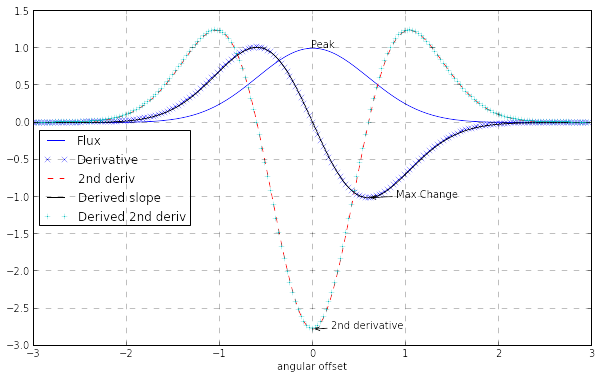

In [32]:
pylab.figure(figsize=(10,6))
theta=np.arange(-5*B, 5*B, B/20.)
pylab.plot(theta,flux(theta,B),label="Flux")
pylab.plot(theta,deriv(theta,B),'bx',label="Derivative")
pylab.plot(theta,deriv2(theta,B),'r--',label="2nd deriv")
pylab.annotate("Peak",(0,1))
pylab.annotate("Max Change",(B,-0.6065/B),xytext=(B+0.3,-0.6065/B),textcoords='data',\
               arrowprops=dict(arrowstyle="->"))
pylab.annotate('2nd derivative',(0,-1.0/(B**2)), xytext=(0.2,-1.0/(B**2)),textcoords='data',\
               arrowprops=dict(arrowstyle="->"))
pylab.plot(theta,-theta*flux(theta,B)/B**2,'k-',label='Derived slope')
pylab.plot(theta,-(B**2-theta**2)*flux(theta,B)/B**4,'c+',label='Derived 2nd deriv')
pylab.grid(linestyle="--")
pylab.xlabel("angular offset")
pylab.legend(loc=6)
pylab.show()